In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM , Dense

# Load your dataset

In [2]:
stock = pd.read_csv("NFLX.csv")

In [3]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [4]:
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1002,2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
1003,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
1004,2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700
1006,2019-12-16,300.850006,305.709991,298.630005,304.209991,304.209991,4658900


In [5]:
stock.shape

(1007, 7)

In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [7]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,226.708094,229.972979,223.105690,226.670159,226.670159,9.730586e+06
std,103.305422,104.851349,101.458611,103.203785,103.203785,6.398967e+06
min,80.570000,84.699997,79.949997,82.790001,82.790001,1.616300e+06
25%,125.779999,127.165001,124.355000,125.514999,125.514999,5.573200e+06
50%,197.850006,199.440002,195.330002,198.000000,198.000000,7.857600e+06
75%,325.529999,330.835006,318.869995,325.220001,325.220001,1.178630e+07
max,421.380005,423.209991,413.079987,418.970001,418.970001,5.841040e+07


### Preprocess the data , scale it

In [8]:
scaler = MinMaxScaler()

In [9]:
stock['Close']

0       122.639999
1       122.510002
2       118.019997
3       116.629997
4       116.239998
           ...    
1002    293.119995
1003    298.929993
1004    298.440002
1005    298.500000
1006    304.209991
Name: Close, Length: 1007, dtype: float64

In [10]:
stock['Close'] = scaler.fit_transform(stock['Close'].values.reshape(-1,1))

In [11]:
stock['Close']

0       0.118538
1       0.118151
2       0.104795
3       0.100660
4       0.099500
          ...   
1002    0.625647
1003    0.642929
1004    0.641472
1005    0.641650
1006    0.658635
Name: Close, Length: 1007, dtype: float64

In [12]:
len(stock)

1007

In [13]:
def create_seuences(stock,sequence_len):
    sequences = []
    for i in range(len(stock) - sequence_len):
        sequences.append(stock[i:i+sequence_len])
    return np.array(sequences)      

In [14]:
sequence_len = 30
sequences = create_seuences(stock['Close'],sequence_len)

In [15]:
stock['Close']

0       0.118538
1       0.118151
2       0.104795
3       0.100660
4       0.099500
          ...   
1002    0.625647
1003    0.642929
1004    0.641472
1005    0.641650
1006    0.658635
Name: Close, Length: 1007, dtype: float64

In [16]:
x = sequences[: , :-1]
y = sequences[: , -1]

## Splitting the data

In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train 

array([[0.8485038 , 0.85724912, 0.8474329 , ..., 0.79885777, 0.79216493,
        0.81182697],
       [0.52361832, 0.53138197, 0.54684991, ..., 0.56044384, 0.63888395,
        0.6917425 ],
       [0.0205842 , 0.        , 0.00157653, ..., 0.04563031, 0.04482718,
        0.04925932],
       ...,
       [0.78922001, 0.80754354, 0.82378491, ..., 0.83113216, 0.85439344,
        0.84636209],
       [0.2785115 , 0.29433638, 0.30447972, ..., 0.3566244 , 0.3471057 ,
        0.33538578],
       [0.01514069, 0.0188292 , 0.01737163, ..., 0.02439169, 0.02147659,
        0.02638468]])

In [19]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train

array([[[0.8485038 ],
        [0.85724912],
        [0.8474329 ],
        ...,
        [0.79885777],
        [0.79216493],
        [0.81182697]],

       [[0.52361832],
        [0.53138197],
        [0.54684991],
        ...,
        [0.56044384],
        [0.63888395],
        [0.6917425 ]],

       [[0.0205842 ],
        [0.        ],
        [0.00157653],
        ...,
        [0.04563031],
        [0.04482718],
        [0.04925932]],

       ...,

       [[0.78922001],
        [0.80754354],
        [0.82378491],
        ...,
        [0.83113216],
        [0.85439344],
        [0.84636209]],

       [[0.2785115 ],
        [0.29433638],
        [0.30447972],
        ...,
        [0.3566244 ],
        [0.3471057 ],
        [0.33538578]],

       [[0.01514069],
        [0.0188292 ],
        [0.01737163],
        ...,
        [0.02439169],
        [0.02147659],
        [0.02638468]]])

In [20]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# Create an LSTM model

In [21]:
model = Sequential()
model.add(LSTM(units = 50 ,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units = 50 ))
model.add(Dense(units=25))
model.add(Dense(units=1))

## Compile the model

In [22]:
from sklearn.metrics import mean_squared_error
model.compile(optimizer='Adam',loss='mean_squared_error')

## Training of the model

In [23]:
history = model.fit(x_train,y_train , epochs=50 , batch_size = 32)

Epoch 1/50
25/25 [==============================] - 9s 47ms/step - loss: 0.0347
Epoch 2/50
25/25 [==============================] - 1s 45ms/step - loss: 0.0034
Epoch 3/50
25/25 [==============================] - 1s 46ms/step - loss: 0.0020
Epoch 4/50
25/25 [==============================] - 1s 48ms/step - loss: 0.0018
Epoch 5/50
25/25 [==============================] - 1s 46ms/step - loss: 0.0018
Epoch 6/50
25/25 [==============================] - 1s 47ms/step - loss: 0.0017
Epoch 7/50
25/25 [==============================] - 1s 45ms/step - loss: 0.0017
Epoch 8/50
25/25 [==============================] - 1s 47ms/step - loss: 0.0016
Epoch 9/50
25/25 [==============================] - 1s 44ms/step - loss: 0.0016
Epoch 10/50
25/25 [==============================] - 1s 48ms/step - loss: 0.0019
Epoch 11/50
25/25 [==============================] - 1s 46ms/step - loss: 0.0020
Epoch 12/50
25/25 [==============================] - 1s 46ms/step - loss: 0.0017
Epoch 13/50
25/25 [==================

## predictions

In [24]:
pred_y = model.predict(x_test)

7/7 [==============================] - 2s 18ms/step


In [25]:
mse = mean_squared_error(y_test,pred_y)

In [26]:
print(f"Mean squared error is : {mse}")

Mean squared error is : 0.00067547706741773


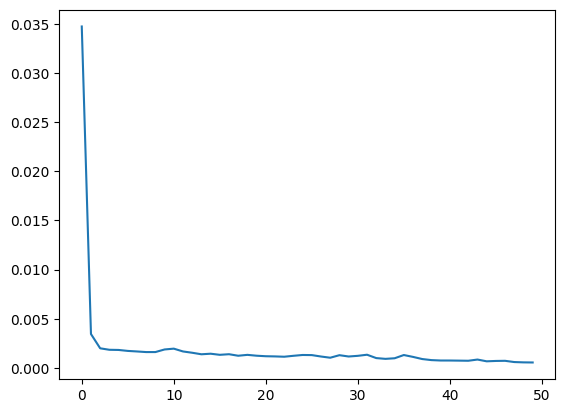

In [27]:
plt.plot(history.history['loss'])

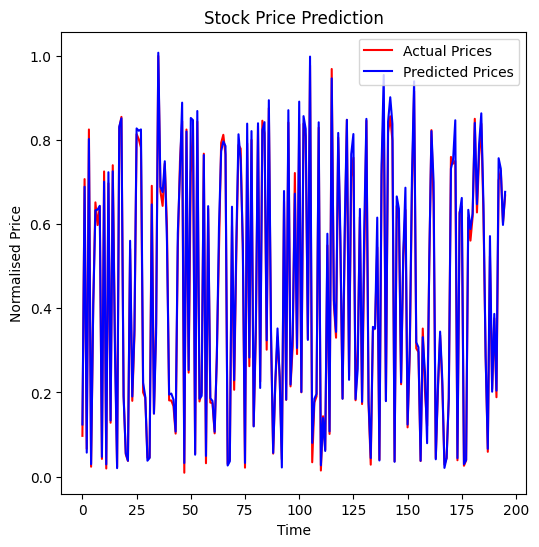

In [30]:
plt.figure(figsize=(6,6))
plt.plot(y_test,label ="Actual Prices",color = 'r')
plt.plot(pred_y,label="Predicted Prices",color = 'b')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Normalised Price')
plt.show()